# Optimisation: CMA-ES

This example shows you how to run a global optimisation with [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Minimising error measure
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      2001027    0:00.1
1     12     1701363    0:00.1
2     18     1701363    0:00.1
3     24     1248186    0:00.1
20    126    1248114    0:00.1
40    246    1245526    0:00.1
60    366    251297.3   0:00.2
80    486    97266.89   0:00.2
100   606    97264.3    0:00.2
120   726    97264.3    0:00.3
140   846    97264.3    0:00.3
160   966    97264.3    0:00.3
180   1086   97264.3    0:00.4
200   1206   97264.3    0:00.4
220   1326   97264.3    0:00.4
240   1446   97264.3    0:00.5
260   1566   97264.3    0:00.5
280   1686   97264.3    0:00.6
300   1806   97264.3    0:00.6
320   1926   97264.3    0:00.6
340   2046   97264.3    0:00.7
360   2166   97264.3    0:00.7
380   2286   97264.3    0:00.7
400   2406   97264.3    0:00.8
420   2526   97264.3    0:00.8
440   2646   97264.3    0:00.8
460   2766   97264.3    0:00

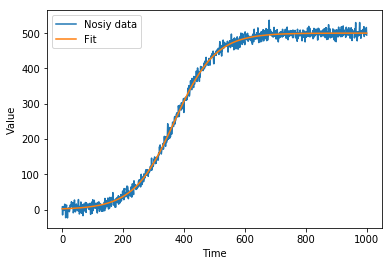

In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.CMAES
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()